# Air Quality Index

## ML model to be used

- Linear Regression
- Lasso Regression
- Ridge Regression*
- Decision Tree Regressor
- KNN Regressor
- RandomForestRegressor
- Xgboost Regressor
- ANN- Artificial Neural Network


## Ridge Regression for training the data

In [3]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Reading the dataframe
data_frame=pd.read_csv('AQI_data.csv')

In [6]:
data_frame.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [7]:
x=data_frame.iloc[:,:-1]#independent features
y=data_frame.iloc[:,-1]#dependent feature

## Spliting the data

In [8]:
#spliting the data by dividing into 70% for training data and 30% for test data

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

- x_train and y_train are used for training the model.
- x_test and y_test are used for test the model.

In [10]:
#initializing the model

In [11]:
model=Ridge()

In [12]:
#fitting the model with data

In [13]:
model.fit(x_train,y_train)

Ridge()

In [14]:
#testing the data with test data
model.score(x_test,y_test)

0.48534227343815906

In [15]:
#testing the data with train data
model.score(x_train,y_train)

0.5515153853622764

In [16]:
#model coefficient values

In [17]:
model.coef_

array([ -2.71975779,   0.47214631,  -3.86106808,  -0.04856315,
        -1.21136253, -39.91994302,  -2.541611  ,   0.56004122])

In [18]:
#model intercept value

In [19]:
model.intercept_

451.7120986497257

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
#cross validation for test data
score=cross_val_score(model,x_test,y_test,cv=5)
score.mean()

0.46529034943183517

In [22]:
#cross validation for train data
score=cross_val_score(model,x_train,y_train,cv=5)
score.mean()

0.5367758830999291

## Evaluating the model

In [23]:
coeff_data=pd.DataFrame({'Coeffecient':model.coef_},index=x.columns)

In [24]:
coeff_data

,Coeffecient
T,-2.719758
TM,0.472146
Tm,-3.861068
SLP,-0.048563
H,-1.211363
VV,-39.919943
V,-2.541611
VM,0.560041


Interpreting the coefficients:

- Freezing the input features other than 'T' , when 1 unit is increased in T; Then there will be a decrease of 2.690 in AQI PM2.5 .
- Freezing the input features other than 'TM' , when 1 unit is increased in TM; then there will be a increase of 0.46 in AQI PM 2.5 .

In [25]:
#chekcing the predictions

In [26]:
predictions=model.predict(x_test)

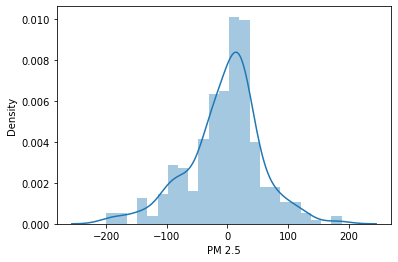

In [27]:
sns.distplot(predictions-y_test);

Text(0.5, 1.0, 'Relation between the y_test and predicted values')

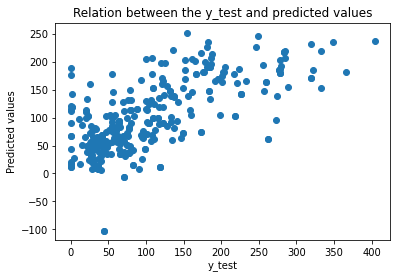

In [28]:
plt.scatter(y_test,predictions);
plt.xlabel('y_test');
plt.ylabel('Predicted values');
plt.title('Relation between the y_test and predicted values')

## Evaluating the model using the most common evaluation metrics from scratch

- MAE:- Mean Absolute Error
- MSE:- Mean Squared Error
- RSME:- Root Mean Squared Error

**MAE**

In [29]:
mae=0
n=len(y_test)
for i,j in zip(y_test,predictions):
    val=abs(i-j)
    mae=mae+val
final_val=(1/n)*mae
print('MAE: ',final_val)

MAE:  44.84190335485329


**MSE**

In [30]:
mse=0
n=len(y_test)
for i,j in zip(y_test,predictions):
    val=(i-j)**2
    mse=mse+val
final_val=(1/n)*mse
print('MSE: ',final_val)

MSE:  3686.9057366357147


**RSME**

In [31]:
rmse=0
n=len(y_test)
for i,j in zip(y_test,predictions):
    val=(i-j)**2
    rmse=rmse+val
final_val=(1/n)*rmse
final_val=final_val**0.2
print('RMSE: ',final_val)

RMSE:  5.168117830805714


In [32]:
#python module for metrics
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  44.841903354853265
MSE:  3686.9057366357147
RMSE:  60.71989572319533
